# Analysing gravitational wave signals
## Mini Project (worth 40%)

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters are:

The mass ratio $q=M_2/M_1$, with convention that $M_1 \ge M_2$ and so $q \le 1$.

The "Chirp mass", which is a quantity used in general relativity, is given by:

$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}$$

**General tips:**

- Explain all your reasoning for each step. A significant fraction of the marks are given for explanations and discussion, as they evidence understanding of the analysis.
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements in the cell below to the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

## Part A- Some background [20 marks]

* **(i)** How do astronomers know that the gravitational waves from the GW150914 event was due to two black holes merging?  <font color="blue">**[5 marks]**</font>

* **(ii)** Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event. <font color="blue">**[5 marks]**</font>
 
* **(iii)** The file CA3_gravitationalwaveevents.csv contains the properties of previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass of the merging sources against their distance.   <font color="blue">**[10 marks]**</font>

**Answer:**

i)<br>
Event GW150914 was estimated to be a Binary Black Hole (BBH) merger and not a Binary Neutron Star Meger (BNS) as the estimated masses of $m_{1}$ and $m_{2}$ were $36{M}_\odot$ and $29{M}_\odot$. These masses are too big to be a Neutron Star as Neutron stars cannot exceed around $2.16{M}_\odot$ before they collapse.

ii)<br>
An events waveform can be split into three sections. The coalescence, the merger and the ringdown. The coalescence is the section prior to the chirp, this occurs as the two masses circle each other. It follows Newtonian physics. The second stage is the merger itself, this is where the spike in the signal occurs. This section follows relativistic physics. Finally, post merger is the ringdown stage.n the ringdown phase, the signal is an exponentially damped sinusoid.

In [2]:
CA3=pd.read_csv('CA3_gravitationalwaveevents.csv')
print(CA3)

             DL       DL_err  Mtot  Mtot_err  Mchirp  Mchirp_err    detType
0    430.000000  -170.000000  63.1      -3.0  28.600      -1.500         GW
1   1060.000000  -480.000000  35.7      -3.8  15.200      -1.100         GW
2    440.000000  -190.000000  20.5      -1.5   8.900      -0.300         GW
3    960.000000  -410.000000  49.1      -3.9  21.500      -1.700         GW
4    320.000000  -110.000000  17.8      -0.7   7.900      -0.200         GW
5   2750.000000 -1320.000000  80.3     -10.2  35.700      -4.700         GW
6    990.000000  -380.000000  56.4      -3.7  25.000      -1.600         GW
7    580.000000  -210.000000  53.4      -2.4  24.200      -1.100         GW
8     40.000000   -10.000000   2.8       NaN   1.186      -0.001         GW
9   1020.000000  -360.000000  59.8      -3.8  26.700      -1.700         GW
10  1850.000000  -840.000000  65.6      -6.6  29.300      -3.200         GW
11  1472.901082  -357.875316   NaN       NaN     NaN         NaN  Candidate
12   812.178

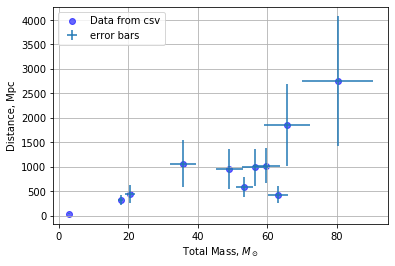

In [3]:
Distance=np.array(CA3['DL'])
Distance_error=np.array(CA3['DL_err'])
Mass_total=np.array(CA3['Mtot'])
Mass_total_error=np.array(CA3['Mtot_err'])

plt.scatter(Mass_total, Distance, color="b", alpha=0.6, label="Data from csv")
plt.errorbar(Mass_total, Distance,
             xerr=Mass_total_error, yerr=Distance_error,
            fmt="none",label='error bars')

plt.ylabel('Distance, Mpc')
plt.xlabel('Total Mass, ${M}_\odot$')
plt.grid()
plt.legend(loc='upper left')

From the graph "Distance distribution of data", we can see that there is no clear separation between GW events and candidates that can be seen just from the distance distribution.

## Part B - The data [15 marks]

Now it is your turn to look at observations and measure the mass and distance of the merging system. We first need to access the observational data measured with the gravitational wave detectors (the waveform observed when two compact, dense astrophysical objects coalesce), and format it correctly.

* **(i)** Read in the datafile of the observed waveform `Dataset1.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. <font color="blue">**[5 marks]**</font>

* **(ii)** The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required for when we compare model waveforms with our data. <font color="blue">**[4 marks]**</font>

* **(iii)**The final data step is that we need to estimate the average noise and standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform. <font color="blue">**[6 marks]**</font> 

**Answer:**

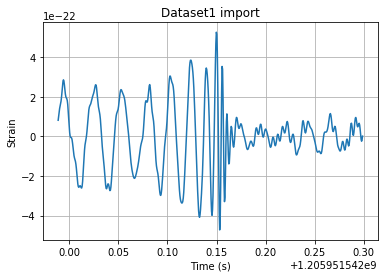

In [33]:
#i) reading in dataset1.csv
datasetIn=pd.read_csv('Dataset1.csv')#using pandas to import the data set

time=datasetIn['time (s)'].values # reading in the time data, reading it in is sensitive to putting the space 
strain=datasetIn['strain'].values # reading in the strain data
plt.plot(time,strain)# a plot to ensure the data is read in
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.title('Dataset1 import')
plt.grid()

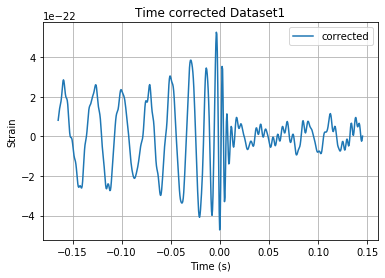

In [34]:
#ii) centering the data sets merger on 0 seconds.
time_change= 1205951542.153363
datasetIn = pd.read_csv('Dataset1.csv')  # Read in file
datasetIn["time (s)"] = datasetIn["time (s)"].apply(lambda t: t-time_change)  # Apply timechange to get merger at t=0

plt.plot(datasetIn["time (s)"],datasetIn["strain"],label='corrected')
plt.grid()
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.title('Time corrected Dataset1')
plt.legend(loc='best')

The mean of the Noise is 1.496e-24
The standard deviation of the noise is 4.787e-23


Text(0, 0.5, 'Strain')

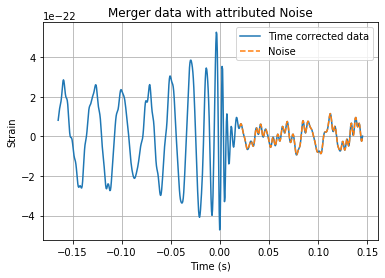

In [35]:
#iii) finding the mean and standard deviation of the noise
post_merger = datasetIn["time (s)"]>=0.02
noise_data = datasetIn[post_merger]
noise_mean = np.mean(noise_data["strain"])
noise_std= np.std(noise_data["strain"])
print("The mean of the Noise is {:.3e}\nThe standard deviation of the noise is {:.3e}".format(noise_mean, noise_std))
plt.plot(datasetIn["time (s)"],datasetIn["strain"],label='Time corrected data')
plt.plot(noise_data["time (s)"],noise_data["strain"],'--',label='Noise')
plt.title('Merger data with attributed Noise')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Strain')

## Part C - Using model waveforms to roughly estimate the total mass of two objects and distance to the system [28 marks]

Now that we have some data, we ideally want to try and compare predicted waveforms for a merger with our observed waveform and use this to derive the mass and distance to the merger.  

Model waveforms are known as **templates** in the gravitational wave community.  In this part of the question we will attempt to produce a waveform for different masses and distances using a reference waveform and scaling it by its change in distance and mass. 

The reference waveform/template we will use is```reference_Mtot40.0Msun_q1.00_Dist1.0Mpc_f_lower10Hz.csv```. This file shows the strain as a function of time (with $t=0$ at the merger) of a system with total mass of the merging objects as $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$. The template has been generated with a lowest frequency of $f_{\rm low}=10$Hz.  

If we have an equal-mass system (i.e $q=1$) with total mass $M=M_1 + M_2$ at a distance $D$, then we can scale the strain of a waveform, $h(t,M,D)$ from a reference waveform with $M^\prime,D^\prime$ as:

$$
h(t,M,D) = \left(\dfrac{M}{M^\prime}\right) \left(\dfrac{D^\prime}{D}\right) ~ h(t^\prime) ~~~~~~~~~[Eq.~1]
$$

where: 

$$ t^\prime=\left(\dfrac{M^\prime}{M}\right)t ~~~~~~~~~[Eq.~2] $$

and $t=0$ is defined as being the time at which the merger occurred.

Note that the templates will have different time sampling rates to your observed data as they are model waveforms.

You will need to include the following steps when answering this question:

* **(i)** Open the template file using the `pandas` package. Write a function in python to scale the time and strain of any waveform with $q=1$, total mass $M$ and distance $D$ from a reference waveform using Equations~1 and 2. In this work we will use the parameters $M=40 M_{sun}$ and $D=1$Mpc for our reference/template waveform. <font color="blue"> **[10 marks]**</font> 
 
* **(ii)** Test your function from part (i) works by subsituting in parameters $M=70\,M_{sun}$ and $D=5$Mpc, and comparing the waveform you produce using your python function with the model template file generated for $M=70\,M_{sun}$ and $D=5$Mpc: `reference_Mtot70.0Msun_q1.00_Dist5.0Mpc_f_lower10Hz.csv`.  Comment on your result <font color="blue"> **[10 marks]** </font>
 
* **(iii)** Use your function to scale the template waveform ($M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$) in mass and distance to make an initial rough estimate "by eye" of the total mass and distance that fit your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). <font color="blue"> **[8 marks]**</font>

**Answer:**

**(i)** The two functions that will be used to scale the time and strains of a waveform. These are done by using the equations given above. As q=1 it needs not to be implemented into this function. There is also an approximant function which can be used to apply both equations at the same time.

In [115]:
def func_strain_scaled(mass, distance, mass_prime, distance_prime, template_strain):
    return ((mass*distance_prime)/((mass_prime*distance))*template_strain)
def func_time_scaled(mass,mass_prime,time):
    return (mass*time)/mass_prime

def approximant(Mass,Distance,templateIn,Mass_ref,Distance_ref):
    q=1
    strain_scale=(strain_ref)*(Mass/Mass_ref)*(Distance_ref/Distance)
    time_scale=(Mass/Mass_ref)*(time_ref)
    return strain_scale,time_scale

Importing the selected wave references, these being one of $M=40 M_{sun}$ and $D=1$Mpc <br>
and the other being $M=70 M_{sun}$ and $D=5$Mpc

In [142]:
# The 40M will be regarded as the reference waveform

Template_40=pd.read_csv("reference_Mtot40.0Msun_q1.00_Dist1.0Mpc_f_lower10Hz.csv")
mass_ref=40 # the inputed reference mass as stated
distance_ref=1 # the inputed reference distance as stated

Template_70=pd.read_csv("reference_Mtot70.0Msun_q1.00_Dist5.0Mpc_f_lower10Hz.csv")
mass_target=70 # the new mass required to test function
distance_target=5 # the new distance required to test function

This is the approximant function working for giving the template, but due to simplicity I use the individual strain and time functions from here onwards.

Text(0.5, 0, 'Time (s)')

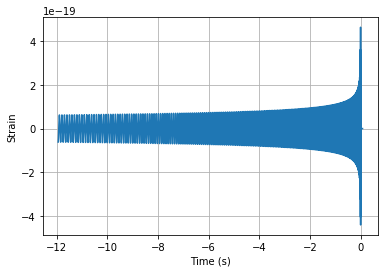

In [146]:
def approximant(Mass,Distance,templateIn,Mass_ref,Distance_ref,strain_ref,time_ref):
    q=1
    strain_scale=(strain_ref)*(Mass/Mass_ref)*(Distance_ref/Distance)
    time_scale=(Mass/Mass_ref)*(time_ref)
    return strain_scale,time_scale

strain_scale_40,time_scale_40=approximant(40,1,Template_40,mass_ref,distance_ref,Template_40['strain'],Template_40['time (s)'])
plt.plot(time_scale_40,strain_scale_40)
plt.grid()
plt.ylabel('Strain')
plt.xlabel('Time (s)')

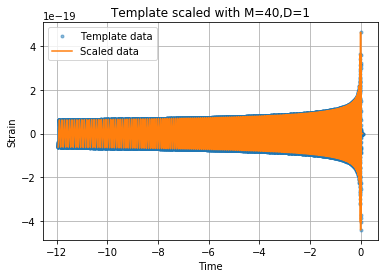

In [147]:
strain_scale = func_strain_scaled(40, 1, mass_ref, distance_ref, Template_40["strain"])
time_scale = func_time_scaled(40, mass_ref, Template_40["time (s)"])

# Testing on new variables M=70, D=5
time_scale_test = func_time_scaled(mass_target, mass_ref, Template_40["time (s)"])
strain_scale_test = func_strain_scaled(mass_target, distance_target, mass_ref, distance_ref, Template_40["strain"])
plt.figure()
plt.plot(Template_40["time (s)"], Template_40["strain"],'.' , alpha=0.5, label="Template data")
plt.plot(time_scale, strain_scale, label="Scaled data")
plt.legend(loc="best")
plt.grid()
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title("Template scaled with M=40,D=1")
plt.show()

As expected, the template fits the data of M=40,D=1 perfectly.<br>
**(ii)**

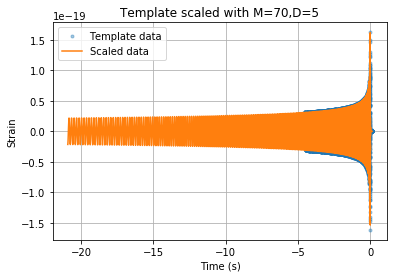

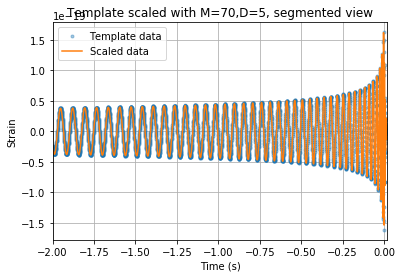

In [148]:
plt.figure(1)
plt.plot(Template_70["time (s)"], Template_70["strain"], ".", alpha=0.4, label="Template data")
plt.plot(time_scale_test, strain_scale_test,label="Scaled data")
plt.legend(loc="best")
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title("Template scaled with M=70,D=5")
plt.show()
plt.figure(2)
plt.plot(Template_70["time (s)"], Template_70["strain"], ".", alpha=0.4, label="Template data")
plt.plot(time_scale_test, strain_scale_test,label="Scaled data")
plt.xlim(-2, 0.02)
plt.legend(loc="best")
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title("Template scaled with M=70,D=5, segmented view")
plt.show()

Here the template is tested by changing the mass from 40 to 70 and the distance from 1 to 5. The template still fits the dataset, however the scaled data is extended further back in the time domain. To show the fit the plot is plotted between the times -2 and just after 0.<br>
**(iii)**<br>
Initial guesses for the fit have revealed that a optimal fit appears at M=76 and D=1700.

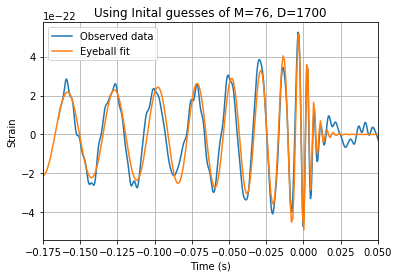

In [149]:
fitted_time = func_time_scaled(76, mass_ref, Template_40["time (s)"])
fitted_strain = func_strain_scaled(76, 1700, mass_ref, distance_ref, Template_40["strain"])#intial guesses taking into account.

plt.figure()
plt.plot(datasetIn["time (s)"], datasetIn["strain"] ,label="Observed data")
plt.plot(fitted_time, fitted_strain, label="Eyeball fit")
plt.xlim(-0.175, 0.05)
plt.legend(loc="best")
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Using Inital guesses of M=76, D=1700')
plt.show()

### Comparison of generate waveform to template 2
$\chi^2 = \sum{\dfrac{(o-e)^2}{e}}$

## Part D - Interpolate the data  [13 marks]

We now need to make a function that will interpolate over our data waveform and allow us to produce an observed waveform with the same time sampling as the template waveform.   This will be crucial for comparing our data (ie our observations) with the templates (ie our model) at each time step later on. Here we will also consider only the time range for which we have data.

* **(i)** Our data waveform starts at some time $t$. Find out what this is.  Next, take your observed data waveform and only output data for $t$ > $t_{\rm min} \rm (data)$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. <font color="blue"> **[5 marks]**</font>

* **(ii)** OK, final step before we get onto to estimating the total mass of the system. To estimate the difference between our observed waveform and model/template waveforms, we now need to put both observed and template waveforms on the same time sampling.  To do this we need to interpolate between our observed data so that we can find an observed strain for each time step and compare it to the predicted strain for the same timestep from our scaled model. Verify this works via plotting or checking the length of the original data array and the new interpolated data array. <font color="blue"> **[8 marks]**</font>

*Hints:*
 * *For (i), one can use the following code example  `index = np.where((data_old > 5)&(data_old<10))[0]`. In simple terms, this type of statement returns a list of index (`index`) where the conditions in the bracket have been met. One can then use `data_old[index]` to pull out the `data_old` numbers that satisfy the conditions.*
 * *For (ii), you should use interpolation, such as that created by ```scipy.interpolate.interp1d```. You can use the following code to do this. If x[index] and y[index] are the observed data from the previous steps, then `interp_fn =interp1d(x[index],y[index],bounds_error=False)`will create an interpolation object of the data and `new_data_y = interp_fn(scaled_template_time)` will take the time values from the scaled template, and output a value for the observed data for each time step of the template.* 

**Answer**

#### Create funcition to limit data to certain times
Test function on the observed data and limit it to min(observed_times) and observed_times<0.02 s

Results are plotted to verify the noise after t=0.02 has been removed

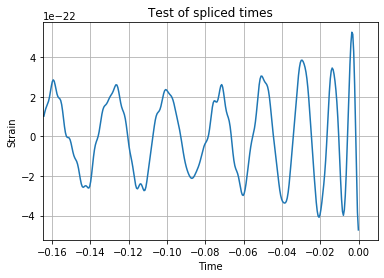

The minimum time of the waveform is -0.1647


In [120]:
def func_time_segment(time, strain):
  
    index = np.where((time>min(datasetIn["time (s)"])) & (time<0.0))[0]# these 
    return index, (time[index], strain[index])

index, (cut_time, cut_strain) = func_time_segment(datasetIn["time (s)"], datasetIn["strain"])
plt.figure()
plt.plot(cut_time, cut_strain)
plt.xlim(min(datasetIn["time (s)"]), 0.01)

plt.grid()
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title("Test of spliced times")
plt.show()
minimum=min(datasetIn["time (s)"])
minimum=round(minimum,4)
print('The minimum time of the waveform is',minimum)

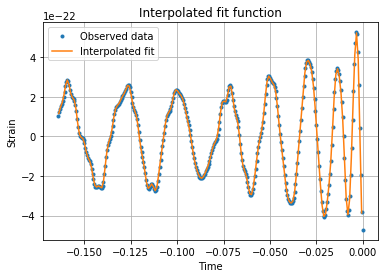

The observed time is of length 337
The interpolated strain has a length 24622
The template has a length of 24622


In [121]:
from scipy.interpolate import interp1d
index, (time_observed, strain_observed) = func_time_segment(datasetIn["time (s)"], datasetIn["strain"])
interp_fn = interp1d(time_observed, strain_observed, bounds_error=False)
new_strain = interp_fn(fitted_time)
plt.figure()
plt.plot(time_observed, strain_observed, ".", label="Observed data")
plt.plot(fitted_time, new_strain, label="Interpolated fit")
plt.legend(loc="best")
plt.grid()
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title("Interpolated fit function")
plt.show()

print("The observed time is of length {}".format(len(time_observed)))
print("The interpolated strain has a length {}".format(len(new_strain)))
print("The template has a length of {}".format(len(Template_40["strain"])))

## Part E - Estimating the best fit total mass using MCMC [55 marks]

Here we will derive the best fitting total mass for the two bodies that collided to produce the wave we see in our data using an MCMC approach.  We will take our "by-eye" estimate of the distance above and then use MCMC to derive the total mass of the system.   We will be comparing the observed waveform with the reference waveform (40$M_{\rm sun}$, D=1Mpc from earlier) (the model) so think carefully about what the likelihood function will be in this case (see Chapters 5-8).  

For this question, the following steps will be needed:
 * **(i)** Use MCMC to sample the total mass, $M$, to produce a best-fit value for your data.  <font color="blue">**[25 marks]**</font>
 * **(ii)**  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC.  <font color="blue">**[20 marks]**</font>
 * **(iii)**  Report the median and 90% credible limits on your value of $M$.  <font color="blue">**[10 marks]**</font>
 
You may assume that:
 * the noise is white and described by a Gaussian distribution, 
 * the total mass is in the range [20,100] $M_{sun}$.
 
_Hints:_
 * _To compare the model template with the data, we will need to have both the reference waveform and the observed data produced for the same time steps and time range. We can do this by interpolating and setting the range of time we want to compare to. An example of interpolating in python is given by_ `data_interp=interp1d(data_time,data_strain,bounds_error=False)`

 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _Think very carefully about the form of your likelihood since here we are comparing observed data with a model when the total mass $M$ is changed  _
 
 * _make sure that the calculations within each step are as quick as possible, so perform as much computation as possible "outside" the MCMC_
 
 * _The step size between samples of the MCMC is quite important. A suggested value is $0.1\,M_{sun}$_
 
 * _Test your MCMC on a small number of samples (e.g. 100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command. To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
`from datetime import datetime,timedelta`

`tstart=datetime.now()`

`print('start time:',tstart)`

`preddur=[Nsteps*0.01,Nsteps*0.02]`

`print('predicted duration: {}-{}s'.format(preddur[0],preddur[1]))`

`predtend=[tstart+timedelta(seconds=preddur[0]),tstart+timedelta(seconds=preddur[1])]`

Use burn in te remove any evidence of initial selection of starting point.
Given any location $y$ can be reached from any location $x$ given finite steps $F$ then given a large enough sample we can ignore the first portion to get true values.

Starting distributtion function should only serve to validate no local maxima/minima. Should not influence results.

**Answer:**

In [100]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy.optimize import curve_fit
from datetime import datetime, timedelta
%matplotlib inline

Firstly defining start 'guessed' masses and a starting distance. The starting masses need to be located around the eyeballed estimate from earlier. This estimate was $76{M}_\odot$. From this, the initial starting masses have been set to $68{M}_\odot$ to $83{M}_\odot$. As for the distance, this is remained at the eyeballed range of $1700Mpc$. 



In [127]:
def func_starting_mass():
    starting_mass = np.random.randint(68,83) # define suitable starting positions, these are close to the eyeball fit
    print("Start mass value ", starting_mass,'Solar Mass')
    return starting_mass
    
def func_starting_distance():
    starting_dist = 1700
    print("Start distance is: ", starting_dist,'Mpc')#kept the same as we want dont need the distance to change yet
    return starting_dist

We need to fit the new data with the time and strain function from question Di)

In [128]:
def func_cutting_new_data(datasetIn, Template_40, new_mass_value=40, new_distance_value=1700):
# Create interp1d object based on observed data
    interp_fn = interp1d(datasetIn["time (s)"], datasetIn["strain"], bounds_error=False)
    
    # Scale template to new_mass_value
    fitted_time = func_time_scaled(new_mass_value, 40, Template_40["time (s)"])
    fitted_strain = func_strain_scaled(new_mass_value, new_distance_value, 40, 1, Template_40["strain"])

    # Interpolate based on trimmed time
    interp_strain_observed = interp_fn(fitted_time)

    # Limit interpolated strain based on tempalte scaled time
    index, (new_observed_time, new_observed_strain) = func_time_segment(fitted_time, interp_strain_observed)
    index, (temp_strip_time, temp_strip_strain) = func_time_segment(fitted_time, fitted_strain)
    return new_observed_strain, temp_strip_strain

The Posterior is calculated using:

$Posterior = (Prior) (Likelihood)$

There are no priors given within the data set, so they are set to 1. <br>Therefore the posterior will be found from the likelihood alone. <br> The Likelihood is found from finding the Chi-Squared values.<br> The chi squared is found by -.5* (imported data set - model) divided by the error within the data^2. Here the error within the data is obtained from the standard deviation within the noise from the original dataset in part B).


In [129]:
def get_posterior(data, model, y_error):
    res = (data-model)**2
    sigma = y_error**2 # x1 for prior
    result = -0.5 * res.sum() / sigma
    return result

This is used to calculate the mean of the converging points

In [130]:
def mean_and_std(data, total_mean, total_std):
    data_mean = np.mean(data)
    data_std = np.std(data)
    total_mean += data_mean
    total_std += data_std
    return data_mean, data_std, total_mean, total_std

Bellow is the function for the MCMC, it returns values of theta in a given ammount N steps.


How the MCMC works: 

1) An intial guess $Mass_{current}$ <br>This is done by generating a random number between 500-2500<br>

2) propose a random step $Mass_{proposed}=Mass_{current}+ \Delta_{Mass}$<br>
This is done by a normal distribution<br>

3) the comparrison of $Mass_{current}$ and $Mass_{proposed}$<br> 

if the probability of theta proposed is greater than theta current, the new proposed is taken and that point is moved onto.<br>

$P(Mass_{proposed}) > P(Mass_{current})$<br>

if theta proposed is smaller than current, then the probability of a move changes to be:<br>

$P_{move}=min(\frac{P(Mass_{proposed})}{P(Mass_{current}},1)$

4) if $P_{move}$ is $<$ 1, then a random number must be generated betweeen 0 and 1. If this random number is smaller or equal to $P_{move}$ then the proposed move is taken, if not, then no move shall occur at this instance.

5) So now a value for $Mass_{current}$ is either accepted as a new value or rejected and kept the same. The process is restarted for this new value or for the same value. It seems counter intuitive to restart the chain with the same $Mass_{current}$ value, but it will get to step 4) and may change.

In [135]:
def func_Mcmc(N, obs_data, template, y_error):

    mass_ref = 40
    dist_ref = 1
    starting_mass = func_starting_mass()
   
    percent_complete = 0
    greater_so_accepted = 0
    random_so_accepted = 0
    unchanged = 0
    
    delta_mass = np.random.normal(0, 0.1, N)
    posterior_array = np.zeros(N+1)
    mass_array = np.zeros(N+1)
    mass_array[0] = starting_mass


    interp_obs_data, fitted_strain_start = func_cutting_new_data(obs_data, template, starting_mass)
    posterior_array[0] = get_posterior(data=interp_obs_data, model=fitted_strain_start, y_error=y_error)  # Calculate chi of start mass
    
    for step in range(N):
        if step % int(N/4) == 0:
            percent_complete += 25
            print("{}% complete...".format(percent_complete))# this returns when each 25% of the mcmc for each run is computed/
        
        current_mass = mass_array[step]
        current_post = posterior_array[step]
        proposed = step+1 

        proposed_mass = current_mass + delta_mass[step]
        interp_obs_data, fitted_strain = func_cutting_new_data(obs_data, template, proposed_mass)
        proposed_post = get_posterior(data=interp_obs_data, model=fitted_strain, y_error=y_error)
        
        prob_cur = current_post
        prob_prop = proposed_post
        prob_move = np.exp(prob_prop - prob_cur)
        random_var = np.random.rand()
       
        if prob_prop > prob_cur:
            greater_so_accepted += 1
            mass_array[proposed] = proposed_mass
            posterior_array[proposed] = proposed_post

       
        elif prob_move > random_var:
            random_so_accepted += 1
            mass_array[proposed] = proposed_mass
            posterior_array[proposed] = proposed_post
        
        else:
            unchanged += 1
            mass_array[proposed] = current_mass
            posterior_array[proposed] = current_post

    return mass_array, posterior_array

In [136]:
# MCMC parameters
N = 1000
runs = 4
masses, chis = np.zeros([runs, N+1]), np.zeros([runs, N+1])
y_error = noise_std

total_mean=[]
for run in range(runs):
    print(f"Starting run {run+1}")
    masses[run], chis[run] = func_Mcmc(N, datasetIn, Template_40, y_error)
    mean_run=round((np.mean(masses[run])),3)
    print('The mean Mass is',mean_run,'Solar masses')
    total_mean.append(mean_run)
    #total_mean=sum(mean)/(runs)

Starting run 1
Start mass value  77 Solar Mass
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 76.999 Solar masses
Starting run 2
Start mass value  71 Solar Mass
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 76.506 Solar masses
Starting run 3
Start mass value  77 Solar Mass
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 77.0 Solar masses
Starting run 4
Start mass value  74 Solar Mass
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 76.848 Solar masses


The total mean mass is 76.83825


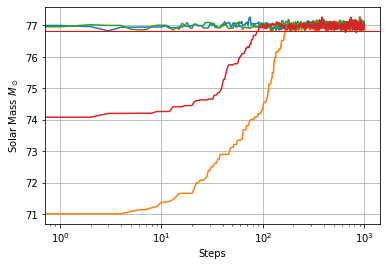

In [137]:
plt.figure()
totalmean=sum(total_mean)
totalmean=(totalmean/runs)
print('The total mean mass is',totalmean)
for run in range(runs):
    plt.plot(masses[run])
    plt.axhline(totalmean,linewidth=1, color='r')
    
plt.xscale("log")
plt.grid()
plt.ylabel('Solar Mass ${M}_\odot$')
plt.xlabel('Steps')
plt.show()

**Comments**<br>
As expected there is a strong convergence around 76/77. This was expected due to the eyeball fit working best at these values. The MCMC converges at around 10^2 steps, anything over that appears to be a waste of computational power. It must be noted that the MCMC requires a intitial value to be withing around +-10 of the true converging value. For instance if I were to initially guess a value of mass to be 40, it would not converge. This is because there can be so-called multiple chi_square minima. If a small value of mass is used it just gets stuck close by (step never wonders far enough to find the better solution).  In the real world we would use a more sophisticated MCMC method than our metropolis hastings to solve this problem. Furhtermore, the further away a mass is from the true value, the longer it takes to converge on the true value.

### Part F - Estimating mass and distance using MCMC for the merging system [37 marks]

Repeat your MCMC analysis to now estimate the total mass, $𝑀$, *and* the distance, $𝐷$. 

 * **(i)** Use MCMC to get $M$ and $D$.  <font color="blue">**[15 marks]**</font>
 * **(ii)**  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC.  <font color="blue">**[10 marks]**</font>
 * **(iii)**  Report the median and 90% credible limits on your value of $M$ and compare your best fit waveform with the data. Comment on your result.  <font color="blue">**[12 marks]**</font>
 
 Note if there are any difficulties completing this component of the coursework, you can still attempt Part G using your by-eye estimates for $M$ and $D$ from Part C, or your $M$ from the MCMC from Part E and your by eye estimate for $D$ in Part C.

_Hints:_
 * *Now your theta_current for the MCMC will have 2 values (Mtot and D) as such you will need to specify 2 initial parameters for theta_current. Whereas before you may have used something like `theta_current.append([Mtot_guess])`, now you will need something like `theta_current.append(np.array([Mtot_guess,D_guess]))` and similarly your `D_theta` will need to have 2 values to tell the MCMC to take a random step in both Mtot and D values in each step of the MCMC.*
 * *Be careful not to get caught up in messy arrays - if in doubt run the MCMC for 5-10 steps and print out the theta_current to check your theta_current[0] ends up looking like it should (ie first element = initial parameters you set up, next elements either the same as before or changed to proposed theta values). If in doubt, ask for help at the weekly exercise classes.*

**Answer:**

In [176]:
def func_Mcmc_mass_distance(N, obs_data, template, y_error):
    """
    Performs MCMC of N steps comparing interp_obs_data to scaled tempalte with changing mass
    """
    ############
#   Initialise strains and arrays
    ############
    mass_ref = 40
    dist_ref = 1
    starting_mass = func_starting_mass()
    starting_dist = func_starting_distance()
    percent_complete = 0
    greater_so_accepted = 0
    random_so_accepted = 0
    unchanged = 0
    delta_mass = np.random.normal(0, 0.1, N)
    delta_dist = np.random.normal(0, 10, N)
    
    posterior_array = np.zeros(N+1)
    
    mass_array = np.zeros(N+1)
    mass_array[0] = starting_mass
    dist_array = np.zeros(N+1)
    dist_array[0] = starting_dist
    
    interp_obs_data, fitted_strain_start = func_cutting_new_data(obs_data, template,
                                                                      new_mass_value=starting_mass,
                                                                      new_distance_value=starting_dist)
    posterior_array[0] = get_posterior(data=interp_obs_data, model=fitted_strain_start, y_error=y_error)  # Calculate chi of start mass

    for step in range(N):

        if step % int(N/4) == 0:
            percent_complete += 25
            print("{}% complete...".format(percent_complete)) 
        current_mass = mass_array[step]
        current_dist = dist_array[step]
        current_post = posterior_array[step]
        proposed = step+1  
        proposed_mass = current_mass + delta_mass[step]
        proposed_dist = current_dist + delta_dist[step]
        interp_obs_data, fitted_strain = func_cutting_new_data(obs_data, template,
                                                                    new_mass_value=proposed_mass,
                                                                    new_distance_value=proposed_dist)
        proposed_post = get_posterior(data=interp_obs_data, model=fitted_strain, y_error=y_error)
        prob_cur = current_post
        prob_prop = proposed_post
        prob_move = np.exp(prob_prop - prob_cur)
        random_var = np.random.rand()

        if prob_prop > prob_cur:
            greater_so_accepted += 1
            mass_array[proposed] = proposed_mass
            dist_array[proposed] = proposed_dist
            posterior_array[proposed] = proposed_post
        elif prob_move > random_var:
            random_so_accepted += 1
            mass_array[proposed] = proposed_mass
            dist_array[proposed] = proposed_dist
            posterior_array[proposed] = proposed_post
        else:
            unchanged += 1
            mass_array[proposed] = current_mass
            dist_array[proposed] = current_dist
            posterior_array[proposed] = current_post
    return mass_array, dist_array, posterior_array

In [177]:
N = 1000
runs = 3
mass_2d, dist_2d, posts_2d = np.zeros([runs, N+1]), np.zeros([runs, N+1]), np.zeros([runs, N+1])
y_error = noise_std
total_mean2=[]
total_mean3=[]
for run in range(runs):
    print(f"Starting run {run+1}")
    mass_2d[run], dist_2d[run], posts_2d[run] = func_Mcmc_mass_distance(N, datasetIn, Template_40, y_error)
    mean_run_2=round((np.mean(mass_2d[run])),3)
    print('The mean Mass is',mean_run_2,'Solar mass')
    total_mean2.append(mean_run_2)
    mean_run_3=round((np.mean(dist_2d[run])),3)
    print('The mean Mass is',mean_run_3,'Solar mass')
    total_mean3.append(mean_run_3)

Starting run 1
Start mass is:  69
Start distance is:  1700
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 76.161 Solar mass
The mean Mass is 1741.31 Solar mass
Starting run 2
Start mass is:  81
Start distance is:  1700
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 77.241 Solar mass
The mean Mass is 1754.287 Solar mass
Starting run 3
Start mass is:  74
Start distance is:  1700
25% complete...
50% complete...
75% complete...
100% complete...
The mean Mass is 76.92 Solar mass
The mean Mass is 1744.121 Solar mass


The total mean mass is 76.774


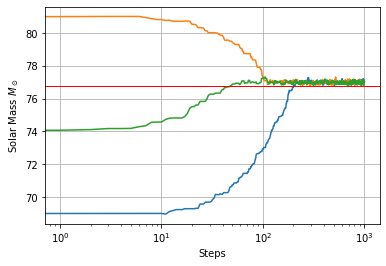

The total mean distance is 1746.5726666666667


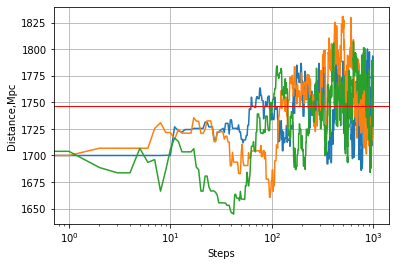

In [178]:
plt.figure()
totalmean2=sum(total_mean2)
totalmean2=(totalmean2/runs)
print('The total mean mass is',totalmean2)

plt.figure(1)
for run in range(runs):
    
    plt.plot(mass_2d[run])
    plt.axhline(totalmean2,linewidth=1, color='r')
plt.xscale("log")
plt.grid()
plt.ylabel('Solar Mass ${M}_\odot$')
plt.xlabel('Steps')
plt.show()
plt.figure(2)
totalmean3=sum(total_mean3)
totalmean3=(totalmean3/runs)
print('The total mean distance is',totalmean3)
for run in range(runs):
    plt.plot(dist_2d[run])
    plt.axhline(totalmean3,linewidth=1, color='r')
plt.xscale("log")
plt.ylabel('Distance,Mpc')
plt.xlabel('Steps')
plt.grid()
plt.show()

**Comments**<br>
Again the mass has centred on a value 76/77, which was expected. The distance however has moved up from 1700 (eyeball fit) to 1746Mpc. This has provided a benefit of using the mcmc over an eyeball fit. Originally for just sampling the mass, the eyeball fit proved worthy enough as my guess value was optimal. The main benefit of the mcmc reduces the time taken for the guesses to occur, and removes any subjectivity, standardising the values. 

## Part G - Putting it all together [32 marks]

You have now measured the total mass for your colliding astrophysical objects and the distance. 

 * **(i)** Calculate the chirp mass for your system and the individual masses of your merging bodies. Comment on your individual masses. <font color="blue">**[5 marks]**</font>

 * **(ii)** Plot your MCMC derived properties alongside the previously discovered gravitational wave systems. <font color="blue">**[5 marks]**</font>
 
 * **(iii)** Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular before the peak amplitude in the wave is reached, estimate the orbital separation in km of the two bodies around peak amplitude.   Think carefully about how the orbital period is related to the period of your gravitational wave. <font color="blue">**[18 marks]**</font>
 * **(iv)** Comment on what your analysis suggests are the best astrophysical candidates for the merging objects? <font color="blue">**[4 marks]**</font>


iii) Use paper at start. Grav is quadropole so either x4 or /4 to get period

**Answer:**

The chirp mass of the system is given by the following equation:<br>
$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}$$<br>
where $m_{1}$ and $m_{2}$ are the two masses.

The mass ratio q is set to 1, so $q=\frac{m_{1}}{m_{2}}=1$<br>
Therefore, $m_{1} = m_{2} = M_{total}$ <br>
From the MCMC, a value of $M_{total}= 76.774$ is given, so dividing $M_{total}$ by 2 will revela the masses of $m_{1} = m_{2}$<br>
therefore $m_{1} = m_{2}=38.387{M}_\odot$<br>
substituting this into the chirp mass equation from above gives...

In [22]:
m1=m2=38.387

Chirp_mass=((m1*m2)**(3/5))/((m1+m2)**(1/5))

print(f'The Chirp Mass of the event is {Chirp_mass:.2f} Solar Mass.')

The Chirp Mass of the event is 33.42 Solar Mass.


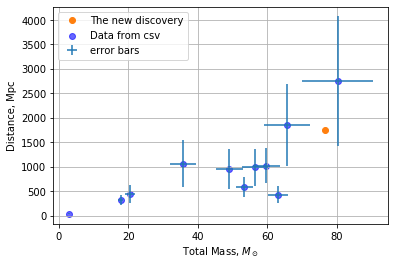

In [21]:
Distance=np.array(CA3['DL'])
Distance_error=np.array(CA3['DL_err'])
Mass_total=np.array(CA3['Mtot'])
Mass_total_error=np.array(CA3['Mtot_err'])
MyMass_total=76.774
MyDistance=1746.5726
plt.scatter(Mass_total, Distance, color="b", alpha=0.6, label="Data from csv")
plt.errorbar(Mass_total, Distance,
             xerr=Mass_total_error, yerr=Distance_error,
            fmt="none",label='error bars')
plt.plot(MyMass_total,MyDistance,'o',label='The new discovery')
#plt.plot(MyMass_total,MyDistance,xerr=std_noise,yerr=std_noise,fmt="none",label='error bars')
plt.ylabel('Distance, Mpc')
plt.xlabel('Total Mass, ${M}_\odot$')
plt.grid()
plt.legend(loc='upper left')

Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular before the peak amplitude in the wave is reached, estimate the orbital separation in km of the two bodies around peak amplitude.   Think carefully about how the orbital period is related to the period of your gravitational wave.

using the equation for the frequency at maximum strain of:
$$\omega_{Kep|max}=\frac{2\pi f_{GW|max}}{2}$$
$$R=(\frac{GM}{\omega^{2}_{Kep|max}})^{\frac{1}{3}}$$

Taking f as being 10hz as shown in the paper then the following can be said for the merger:

The separation distance of the BBH merger is 25     4562.44
58     4235.02
90     3904.92
117    3615.16
147    3278.89
176    2936.54
201    2624.52
224    2320.08
246    2008.86
267    1687.30
286    1367.25
303    1044.89
315     783.50
325     525.92
334     216.14
340     196.06
344     355.15
350     541.91
353     623.71
359     773.18
363     865.16
368     973.68
388    1359.44
410    1728.11
426    1972.90
428    2002.42
437    2132.68
456    2395.46
459    2435.63
464    2501.85
482    2733.38
488    2808.38
491    2845.51
506    3027.66
532    3331.11
553    3566.43
580    3858.05
608    4149.26
631    4381.01
634    4410.78
Name: time (s), dtype: float64 Km


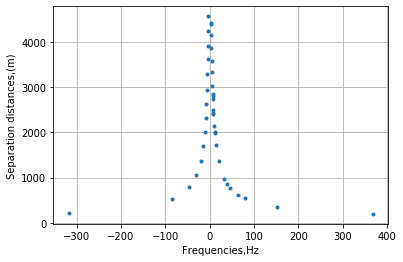

In [208]:
G=6.67E-11
M=76*1.989E30#convert solar mass to kilograms
strain_0=np.where(np.diff(np.sign(datasetIn["strain"])))[0] # we need to find where the strain is changing
#print(strain_0)
time_0=datasetIn["time (s)"][strain_0]#index the time where strain is at its peak

f=1/(2*time_0)# 2 comes from quadrapole factor
#print(f)
w=(2*np.pi*f)/2
R=(((G*M)/(w**2))**(1/3))*10**-3
R=round(R,2)
print('The separation distance of the BBH merger is',R,'Km')
plt.plot(f,R,'.')
plt.xlabel('Frequencies,Hz')
plt.ylabel('Separation distances,(m)')
plt.grid()
#from this we can see the separation distance varies with frequencies

iv)
The new discovery seems like a candadate for a Binary Black Hole merger due to its high masses of $33.42{M}_\odot$, these are too high to be related to neutron stars.